Can we predict them all?

This is an exploration and analysis of the Pokemon from genrations 1 to 6. The data is from [kaggle user alopez247](https://www.kaggle.com/alopez247/pokemon/data).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
df_master = pd.read_csv('../data/pokemon_alopez247.csv')
df_master = df_master.set_index('Number')

Let's take a quick look at the data.

In [3]:
df_master.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


The pokemon data has many features, both numerical and categorical.

Numerical features include `Total`, `HP` and `Weight_kg` to name a few. Categorical features include: `Type_1` and `Egg_Group_1`. There are also binary categorical variables like `isLegendary` and `hasMegaEvolution`.

In [16]:
print 'There are %s total features in the data set. \n' % len( list(df_master))
print list(df_master)

There are 22 total features in the data set. 

['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

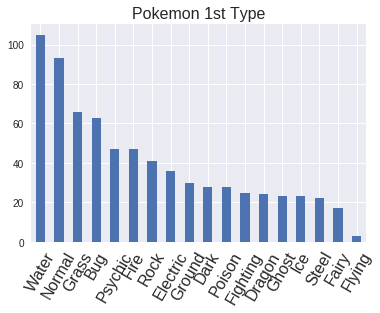

In [24]:
df_master['Type_1'].value_counts().plot( kind='bar')
plt.title('Pokemon 1st Type', fontsize=16)
plt.xticks( fontsize=16, rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

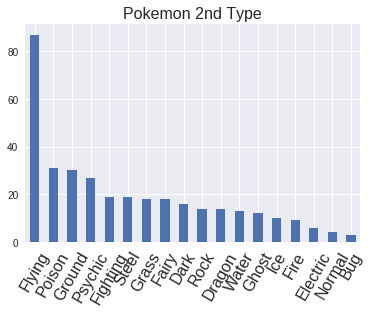

In [25]:
df_master['Type_2'].value_counts().plot( kind='bar')
plt.title('Pokemon 2nd Type', fontsize=16)
plt.xticks( fontsize=16, rotation=60)

In [67]:
numberType1Only  = len(df_master.Type_2[ df_master['Type_2'].isnull()])
percentType1Only = 100.0* float( numberType1Only) / float( len( df_master))
print 'There are %s different values for Type_1.' % len(df_master['Type_1'].unique())
print 'There are %s different values for Type_2.' % len(df_master.Type_2[ df_master['Type_2'].notnull() ].unique())
print 'There are %s pokemon (%.2f percent) that do not have a 2nd Type.' % ( numberType1Only, percentType1Only)

There are 18 different values for Type_1.
There are 18 different values for Type_2.
There are 371 pokemon (51.46 percent) that do not have a 2nd Type.


In [7]:
df_master['Type_2'].value_counts()

Flying      87
Poison      31
Ground      30
Psychic     27
Fighting    19
Steel       19
Grass       18
Fairy       18
Dark        16
Rock        14
Dragon      14
Water       13
Ghost       12
Ice         10
Fire         9
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

In [8]:
df_master.groupby('Type_1')['Weight_kg'].describe()

,count,mean,std,min,25%,50%,75%,max
Type_1,,,,,,,,
Bug,63.0,29.250794,40.029142,0.6,6.200,17.00,33.000,200.5
Dark,28.0,39.850000,44.922035,2.1,11.600,29.00,47.000,203.0
Dragon,24.0,114.912500,113.143584,2.8,20.575,77.50,164.500,345.0
Electric,36.0,37.447222,45.935654,0.3,6.000,22.75,54.450,180.0
Fairy,17.0,24.923529,51.326157,0.1,3.000,7.50,23.500,215.0
Fighting,25.0,54.924000,53.384441,8.0,21.000,40.00,55.500,253.8
Fire,47.0,63.976596,78.937309,2.5,19.000,35.00,79.950,430.0
Flying,3.0,52.000000,39.661064,8.0,35.500,63.00,74.000,85.0
Ghost,23.0,53.813043,134.160475,0.1,2.700,13.00,39.750,650.0


# What's that type?

**Can we predict the type of a pokemon?**

A pokemon's type is representatitve of the elemental properties of the pokemon. Pokemon have can have one or two types and are represented in the data as features `Type_1` and `Type_2`. In most cases a Pokemon with two types have their more representative type listed first, though this is not only the case. For this analysis we will see if there is predictive power in the pokemon's other features that could indicate to us its type.

## Data Preparation

We will use the following features to predict pokemon type:

- Battle Attributes: `Total`, `HP`, `Attack`, `Defense`, `Sp_Atk`, `Sp_Def`, `Speed`
- Physical Attributes: `Color`, `hasGender`, `Egg_Group_1`, `Egg_Group_2`, `Height_m`, `Weight_kg`, `Body_style`
- Other: `Generation`

In [177]:
df_type = df_master.drop([ 'Name', 'isLegendary', 'hasMegaEvolution', 'Pr_Male'], axis=1)
# df_type.head()

For analysis we will need to convert categorical data into numerical values.

Let's make a function to convert the remainding categorical data to numerical values.

In [175]:
def convertCat2Num( series):
    series = series.astype('category')
    series = series.cat.codes
    return series.astype('int64')

In [178]:
# convert categorical data into numerical values
df_type.Color       = convertCat2Num( df_type.Color)
df_type.Egg_Group_1 = convertCat2Num( df_type.Egg_Group_1)
df_type.Egg_Group_2 = convertCat2Num( df_type.Egg_Group_2)
df_type.Body_Style  = convertCat2Num( df_type.Body_Style)

df_type.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Color,hasGender,Egg_Group_1,Egg_Group_2,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,
1,Grass,Poison,318,45,49,49,65,65,45,1,3,True,10,6,0.71,6.9,45,9
2,Grass,Poison,405,60,62,63,80,80,60,1,3,True,10,6,0.99,13.0,45,9
3,Grass,Poison,525,80,82,83,100,100,80,1,3,True,10,6,2.01,100.0,45,9
4,Fire,NaN,309,39,52,43,60,50,65,1,7,True,10,2,0.61,8.5,45,0
5,Fire,NaN,405,58,64,58,80,65,80,1,7,True,10,2,1.09,19.0,45,0


In [181]:
columnIndex = df_type.columns
features = df_type[ columnIndex[2:]]
type1 = df_type['Type_1']
# features.head()

## Type 1 Classification

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn import metrics

In [189]:
clf_log = LogisticRegression( C=0.1)

In [190]:
X_train, X_test, y_train, y_test = train_test_split( features, type1, test_size=0.25, random_state=12)

In [191]:
clf_log.fit( X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
y_predict = clf_log.predict( X_test)

In [206]:
print 'Summary metrics for Logistic Regression: \n %s' \
        % metrics.classification_report( y_test, y_predict)

Summary metrics for Logistic Regression: 
              precision    recall  f1-score   support

        Bug       0.58      0.65      0.61        17
       Dark       0.33      0.14      0.20         7
     Dragon       0.00      0.00      0.00         7
   Electric       0.40      0.29      0.33         7
      Fairy       0.00      0.00      0.00         6
   Fighting       0.00      0.00      0.00         2
       Fire       0.10      0.11      0.11         9
     Flying       0.00      0.00      0.00         1
      Ghost       0.29      0.33      0.31         6
      Grass       0.36      0.21      0.27        19
     Ground       0.67      0.22      0.33         9
        Ice       0.00      0.00      0.00         4
     Normal       0.42      0.71      0.53        21
     Poison       0.00      0.00      0.00         9
    Psychic       0.18      0.18      0.18        11
       Rock       0.12      0.14      0.13         7
      Steel       0.00      0.00      0.00         5
  

/home/julien/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


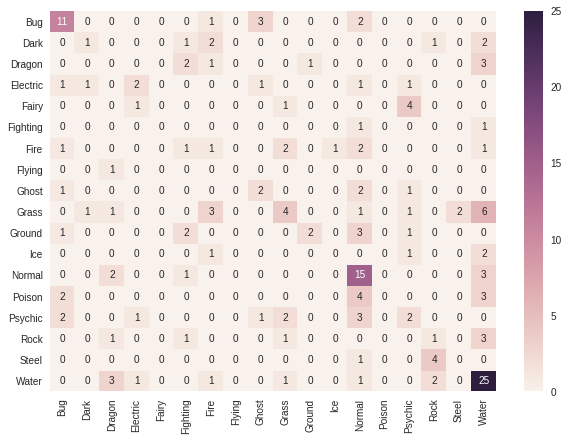

In [205]:
type1_categories = df_master['Type_1'].astype('category').cat.categories

df_cm = pd.DataFrame( metrics.confusion_matrix( y_test,  y_predict), index=type1_categories,
                    columns=type1_categories)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

As shown above, very few types were properly predicted by the simple logistic regression. Only 36% of the test set pokemon had their types correctly predicted, as indicated by the average recall of 0.36. Unsurprisingly, Bug, Normal and Water types were the best performing since the 

## Type variable transformation

For this analysis, I want to be agnostic of the type order.
I also want to transform the categorical feautre values of `Type_1` and `Type_2` into numerical indicators. We will do this by first removing all the `NaN` values from the `Type_2` feature and then combining the two feature values together in order to make our dummy variable indicators.

In [133]:
df_type = df_master.drop([ 'Name', 'isLegendary', 'hasMegaEvolution', 'Pr_Male'], axis=1)
df_type.Type_2.loc[ df_type['Type_2'].isnull() == True] = ''
typeSeries = df_type['Type_1'] + '|' + df_type['Type_2']
typeMatrix = typeSeries.str.get_dummies('|')

print 'Here is the list of binary type indicators:'
typeMatrix.head()

Here is the list of binary type indicators:


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Number,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [134]:
df_type = pd.merge( typeMatrix, df_type.drop([ 'Type_1', 'Type_2'], axis=1), left_index=True, right_index=True)
df_type.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,...,Speed,Generation,Color,hasGender,Egg_Group_1,Egg_Group_2,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,...,45,1,Green,True,Monster,Grass,0.71,6.9,45,quadruped
2,0,0,0,0,0,0,0,0,0,1,...,60,1,Green,True,Monster,Grass,0.99,13.0,45,quadruped
3,0,0,0,0,0,0,0,0,0,1,...,80,1,Green,True,Monster,Grass,2.01,100.0,45,quadruped
4,0,0,0,0,0,0,1,0,0,0,...,65,1,Red,True,Monster,Dragon,0.61,8.5,45,bipedal_tailed
5,0,0,0,0,0,0,1,0,0,0,...,80,1,Red,True,Monster,Dragon,1.09,19.0,45,bipedal_tailed


Let's make a function to convert the remainding categorical data to numerical values.

In [145]:
def convertCat2Num( series):
    series = series.astype('category')
    series = series.cat.codes
    return series.astype('int64')

In [146]:
# convert categorical data into numerical values
df_type.Color       = convertCat2Num( df_type.Color)
df_type.Egg_Group_1 = convertCat2Num( df_type.Egg_Group_1)
df_type.Egg_Group_2 = convertCat2Num( df_type.Egg_Group_2)
df_type.Body_Style  = convertCat2Num( df_type.Body_Style)

df_type.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,...,Speed,Generation,Color,hasGender,Egg_Group_1,Egg_Group_2,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,...,45,1,3,1,10,7,0.71,6.9,45,9
2,0,0,0,0,0,0,0,0,0,1,...,60,1,3,1,10,7,0.99,13.0,45,9
3,0,0,0,0,0,0,0,0,0,1,...,80,1,3,1,10,7,2.01,100.0,45,9
4,0,0,0,0,0,0,1,0,0,0,...,65,1,7,1,10,3,0.61,8.5,45,0
5,0,0,0,0,0,0,1,0,0,0,...,80,1,7,1,10,3,1.09,19.0,45,0


In [155]:
# df_type.dtypes

## Logistic Regression

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression

In [161]:
clf_log = LogisticRegression()

In [ ]:
X = df_type[]

X_train, X_test, y_train, y_test = train_test_split( test_size=0.25, random_state=150, shuffle=True)

In [173]:
columns = df_type.columns
df_type

,Bug,Dark
Number,,
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [171]:
a = df_type.columns

### Properties of Egg_Group features

In [91]:
print df_type.Egg_Group_1.unique()
print df_type.Egg_Group_2.unique()

['Monster' 'Bug' 'Flying' 'Field' 'Undiscovered' 'Fairy' 'Grass' 'Water_1'
 'Human-Like' 'Water_3' 'Mineral' 'Amorphous' 'Water_2' 'Ditto' 'Dragon']
['Grass' 'Dragon' 'Water_1' nan 'Fairy' 'Field' 'Water_3' 'Water_2'
 'Flying' 'Bug' 'Human-Like' 'Amorphous' 'Mineral' 'Monster']


In [83]:
print 'There are %s different values for Type_1.' % len(df_master['Egg_Group_1'].unique())
print 'There are %s different values for Type_2.' % len(df_master.Egg_Group_2[ df_master['Egg_Group_2'].notnull() ].unique())

There are 15 different values for Type_1.
There are 13 different values for Type_2.


In [106]:
i = 0
for egg in df_master.Egg_Group_2[ df_master['Egg_Group_2'].notnull() ].unique():
    if egg in df_master['Egg_Group_1'].unique():
        pass
    else:
        i += 1
        print 'Value %s of Egg_Group_2 not found in Egg_Group_1' % egg
if i == 0:
    print 'All Egg_Group_2 values are the same as those in Egg_Group_1'

All Egg_Group_2 values are the same as those in Egg_Group_1
